# Distances and Timeseries

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import slideUtilities as sl
import laUtilities as ut
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [4]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Today we will start building some tools for making comparisons of data objects, with particular attention to timeseries.

Working with data, we can encounter a wide variety of different data objects:

* Records of users
* Graphs
* Images
* Videos
* Text (webpages, books)
* Strings (DNA sequences)
* Timeseries
* ...

How can we compare them?

## Feature space representation

Usually a data object consists of a set of attributes.

These are also commonly called __features.__

* ("J. Smith", 25, \$ 200,000)

If all d dimensions are real-valued then we can visualize each data object as a point in a vector space.
 
* (25, USD 200,000) $\rightarrow \mat{{c}25\\200000}$.

Likewise If all features are binary then we can think of each data object as a binary vector in vector space.

The space is called __feature space.__

We then are naturally interested in how __similar__ or __dissimilar__ two objects are.

A dissimilarity function takes two objects as input, and returns a large value when then two objects are not very similar.

Often we put restrictions on the dissimilarity function.

One of the most common is that it be a __metric.__

The dissimilarity $d(x, y)$ between two objects $x$ and $y$ is a
__metric__ if

* $d(i, j) = 0 \leftrightarrow i == j$. (identity of indiscernables)
* $d(i, j) = d(j, i)$ (symmetry)
* $d(i, j) \leq d(i, h)+d(h, j)$ (triangle inequality)

A metric is also commonly called a __distance__.

Sometimes we will use "distance" informally, ie, to refer to a dissimilarity function even if we are not sure it is a metric.   We'll try to say "dissimilarity" in those cases though.

Definitions of distance or dissimilarity functions are usually
diferent for real, boolean, categorical, and ordinal
variables.

Weights may be associated with diferent variables
based on applications and data semantics.

## Matrix representation

Very often we will manage data conveniently in matrix form.

The standard way of doing this is:

$$ \mbox{$m$ data objects}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}x_{11}\\\vdots\\x_{i1}\\\vdots\\x_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1j}\\\vdots\\x_{ij}\\\vdots\\x_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1n}\\\vdots\\x_{in}\\\vdots\\x_{mn}\end{array}
\end{array}\right]}^\mbox{$n$ features} $$

Where we typically use symbols $m$ for number of rows (objects) and $n$ for number of columns (features).


When we are working with distances, the matrix representation is:

$$ \mbox{$m$ data objects}\left\{\begin{array}{c}\;\\\;\\\;\\\;\end{array}\right.\;\;
\overbrace{\left[\begin{array}{cccc}
\begin{array}{c}0\\d(1,2)\\d(1,3)\\\vdots\\d(1,m)\end{array} &
\begin{array}{c}\;\\0\\d(2,3)\\\vdots\\d(2,m)\end{array} &
\begin{array}{c}\;\\\;\\\ddots\\\vdots\\\dots\end{array} &
\begin{array}{c}\;\\\;\\\;\\\;\\0\end{array} \\
\end{array}\right]}^\mbox{$m$ data objects} $$


## Norms

Assume some function $p(\vv)$ which measures the "size" of the vector $\vv$.

$p()$ is called a __norm__ if:

* $p(a\vv) = |a|\; p(\vv)$  (absolute scaling)
* $p(\vu + \vv) \leq p(\vu) + p(\vv)$  (subadditivity)
* $p(\vv) = 0 \leftrightarrow \vv$ is the zero vector (separates points)

Norms are important for this reason:
    
__Every norm defines a corresponding metric.__

That is, if $p()$ is a norm, then $d(\vx, \vy) = p(\vx-\vy)$ is a metric.

__$\ell_p$__ Norm.

Defines the _Minkowski distance._

$$ L_p(\vx, \vy) = \left(\sum_{i=1}^d |x_i - y_i|^p\right)^{\frac{1}{p}} $$

A special case of this isthe $\ell_2$ norm that we've already studied, which defines the __Euclidean__ norm.

It is equal to the euclidean distance between the vectors.

$$ L_1(\vx, \vy) = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}$$

Another important special case is the $\ell_1$ norm.

This defines the __Manhattan__ distance, or (for binary vectors), the __Hamming__ distance:

$$ L_1(\vx, \vy) = \sum_{i=1} |x_i - y_i| $$

## Similarity and Dissimilarity

We've already seen that the inner product of two vectors can be used to compute the __cosine of the angle__ between them:

$$ \cos(\vx, \vy) = \frac{\vx^T\vy}{\Vert\vx\Vert \Vert\vy\Vert} $$

Note that this value is __large__ when $\vx \approx \vy.$  So it is a __similarity__ function.

We often find that we have a similarity function and need to convert it to a dissimilarity function.   Two straightforward ways of doing that are:

$$d(x,y) = 1/s(x,y)$$

$$d(x,y) = k - s(x,y)$$

For some properly chosen $k$.

For cosine similarity, one often uses:
    
$$ d(\vx, \vy) = 1 - \cos(\vx, \vy)$$

Note however that this is __not a metric!.__

However if we recover the actual angle beween $\vx$ and $\vy$, that is a metric.

## Bit vectors and Sets

When working with bit vectors, the $\ell_1$ metric is commonly used and called the __Hamming__ distance.

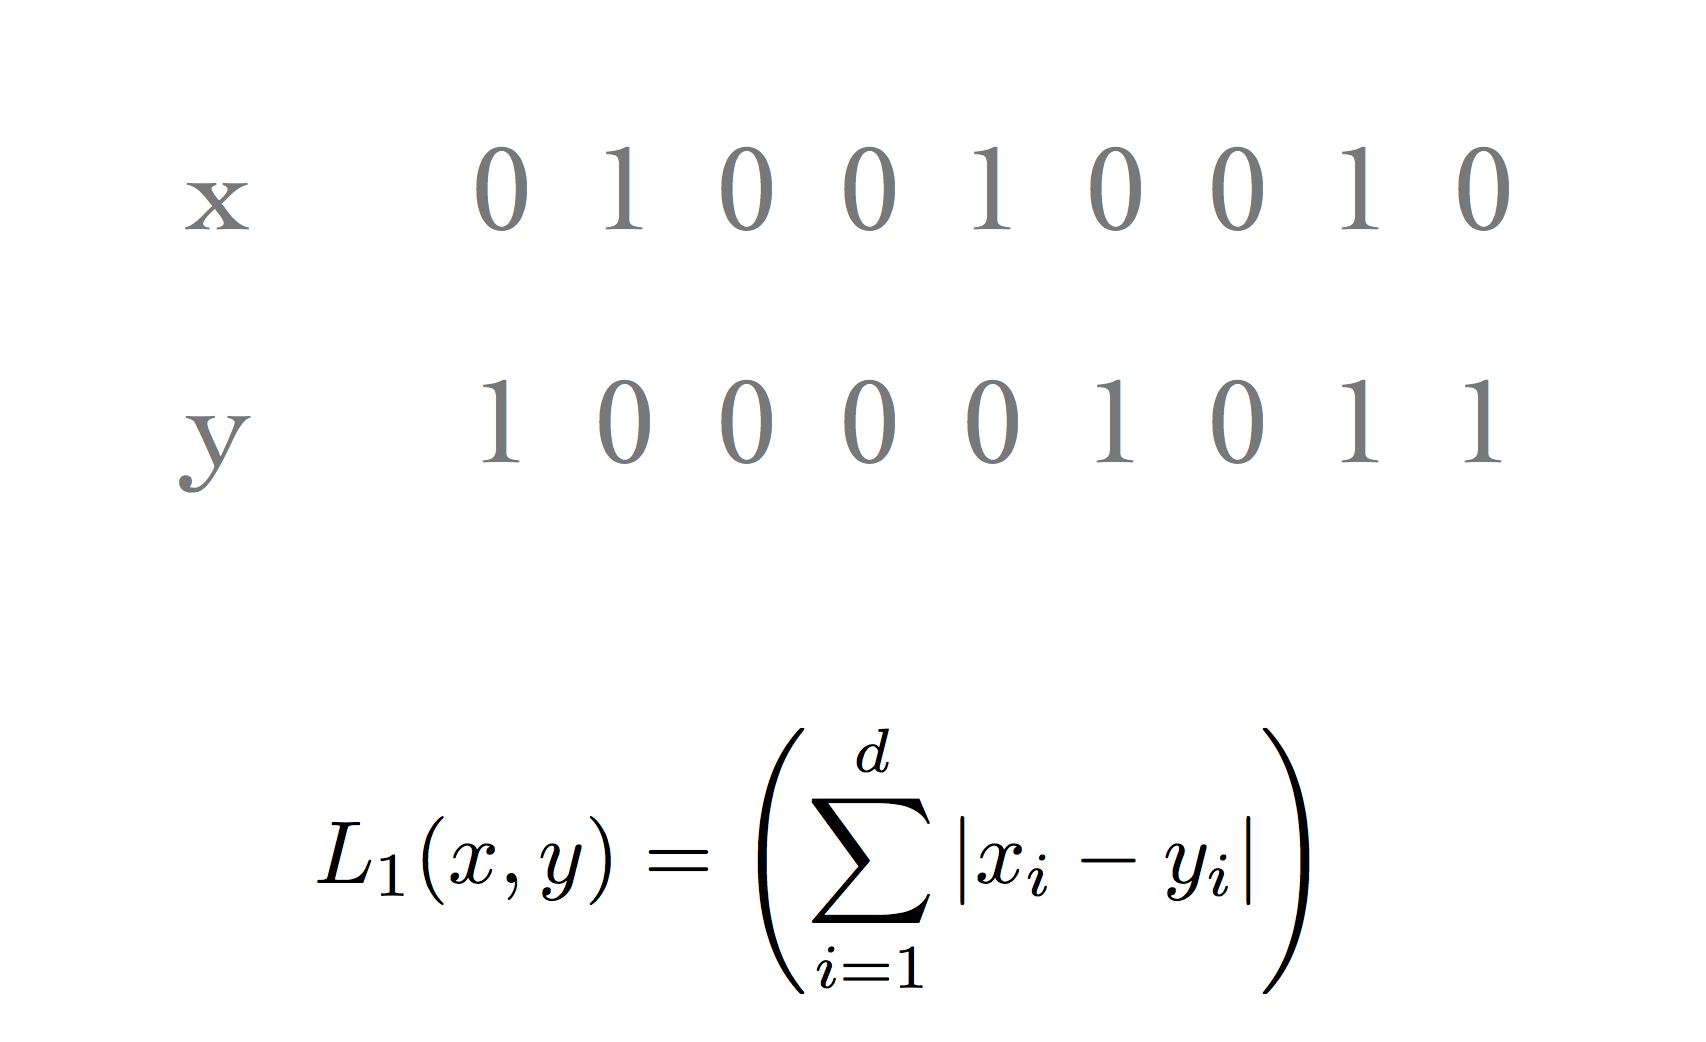

In [12]:
sl.hide_code_in_slideshow()
display(Image("figs/L5-hamming-1.png", width=550))

This has a natural interpretation: "how well do the two vectors match?"

Or: "What is the smallest number of bit flips that will convert one vector into the other?"

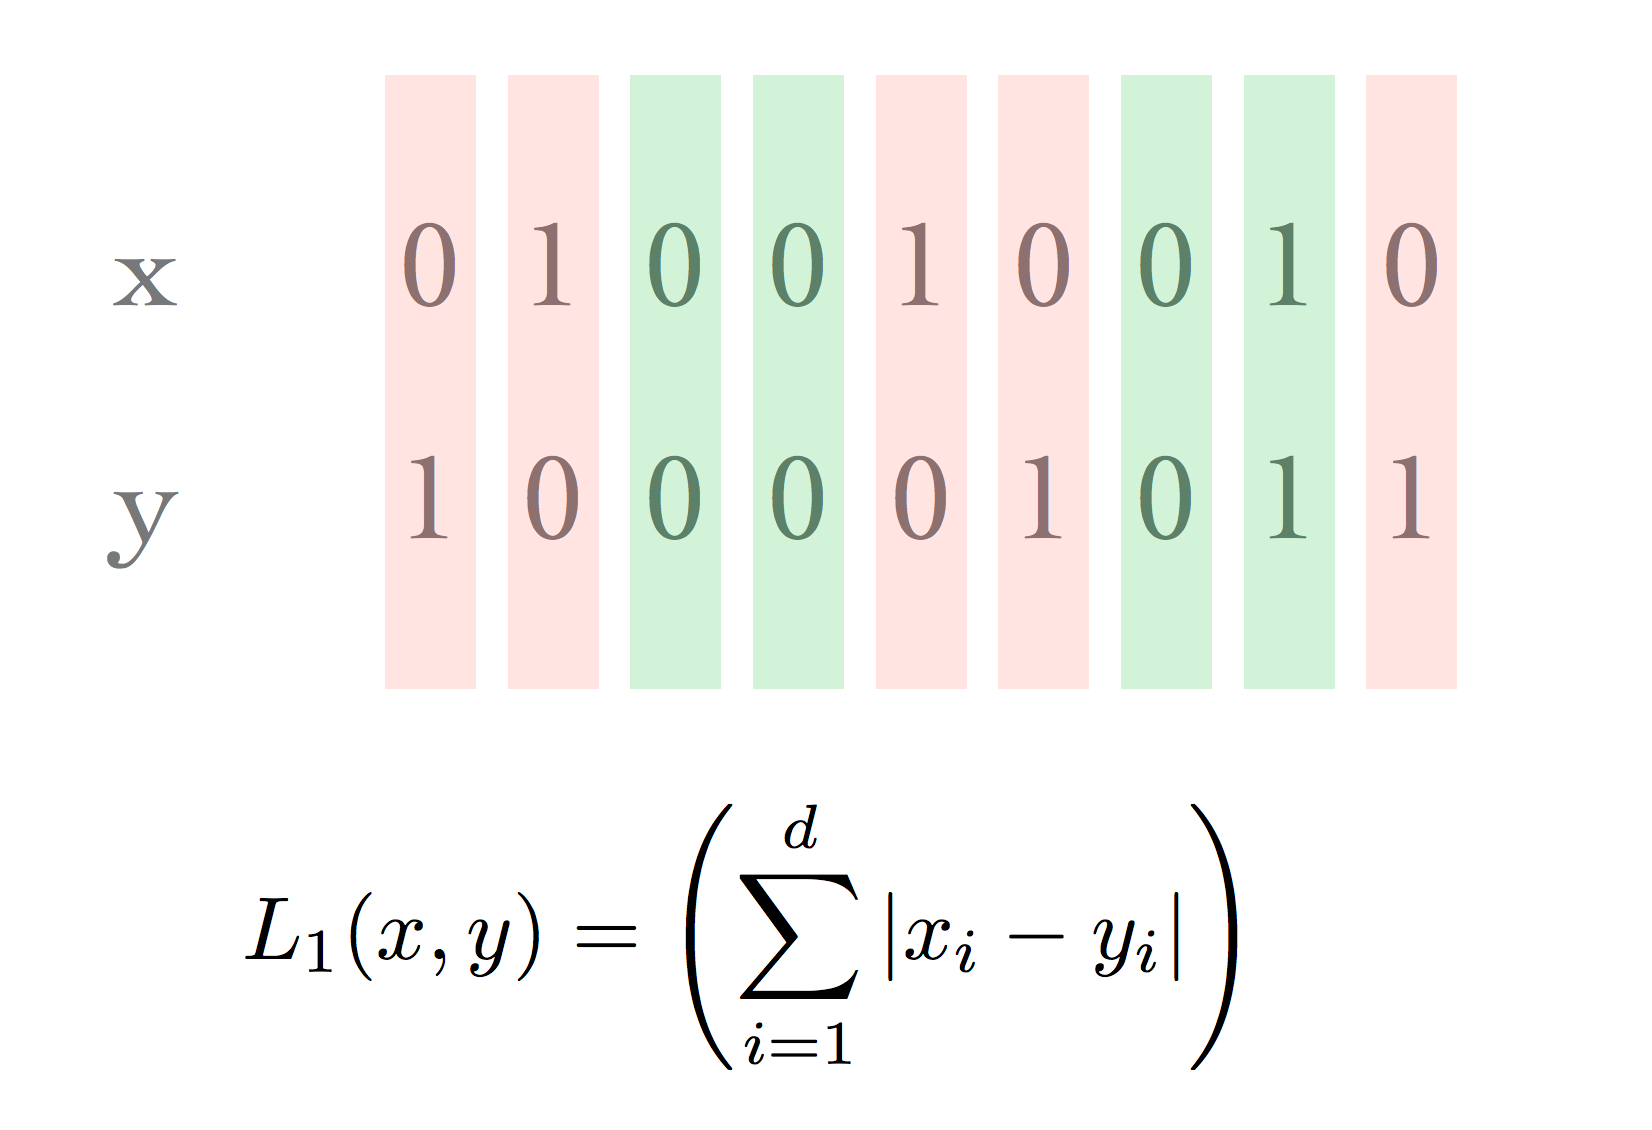

In [15]:
sl.hide_code_in_slideshow()
display(Image("figs/L5-hamming-2.png", width=550))

In other cases, the Hamming distance is not a particular appropriate metric.

Consider the case in which the bit vector is being used to represent a set.

In that case, Hamming distance measures the __size of the set difference.__

For example, two documents.   We will use bit vectors to represent the sets of words in each document.

* Case 1: both documents are large, almost identical, but differ in 10 words.
* Case 2: both documents are small, disjoint, have 5 words each.

The situation can be represented as this:

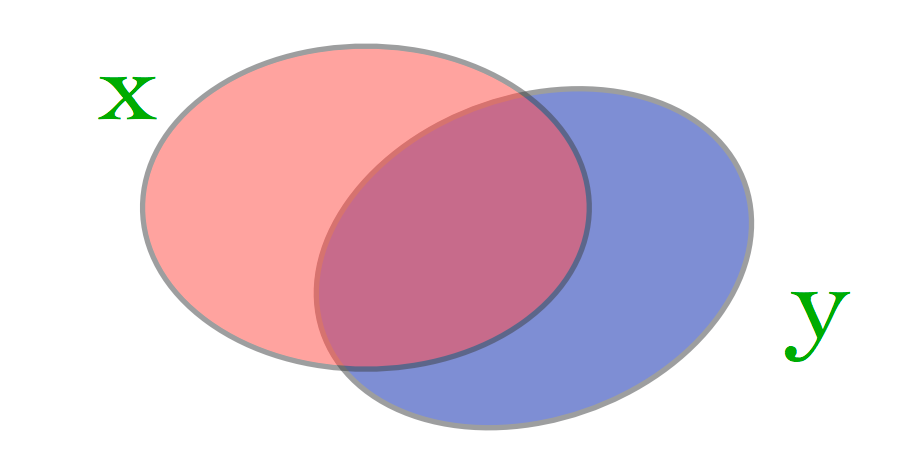

In [16]:
sl.hide_code_in_slideshow()
display(Image("figs/L5-jaccard-1.png", width=550))

What matters is not just the size of the set difference, but the size of the intersection as well.

This leads to the _Jaccard_ similarity:

$$JSim(\vx, \vy) = \frac{|\vx \cap \vy|}{|\vx \cup \vy|}$$

This takes on values from 0 to 1, so a natural dissimilarity metric is $1 - JSim().$

In fact, this is a __metric!__:

$$JDist(\vx, \vy) = 1- \frac{|\vx \cap \vy|}{|\vx \cup \vy|}$$

Consider our two cases:
    
Case 1: (very large almost identical documents)

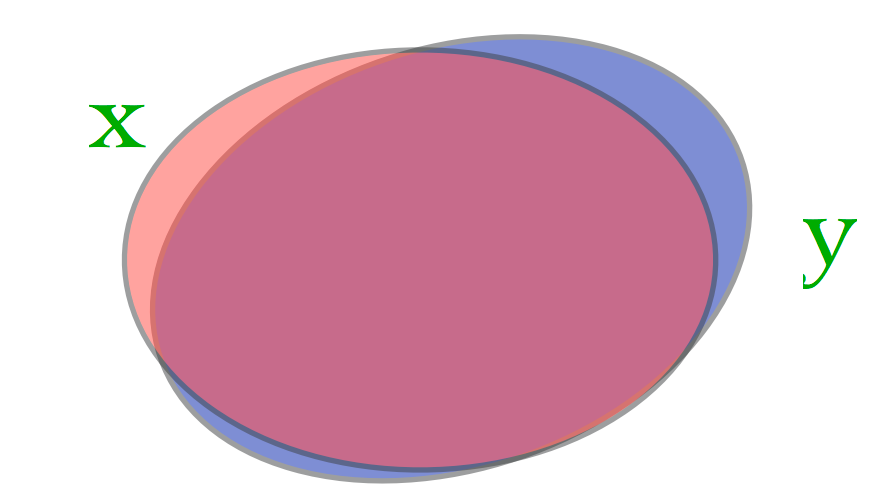

In [17]:
sl.hide_code_in_slideshow()
display(Image("figs/L5-jaccard-2.png", width=550))

Here $JSim(\vx, \vy)$ is almost 1.

Case 2: (small disjoint documents)

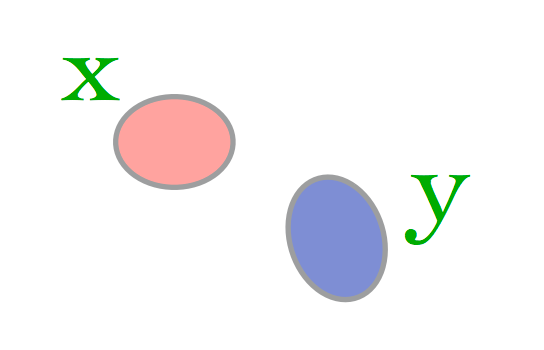

In [19]:
sl.hide_code_in_slideshow()
display(Image("figs/L5-jaccard-3.png", width=550))

Here $JSim(\vx, \vy)$ is 0.

## Time Series

A time series is a sequence of real numbers, representing the measurements of a real variable at (equal) time intervals.

* Stock prices
* Volume of sales over time
* Daily temperature readings

A time series database is a large collection of time series.

In [ ]:
correlaton is really inner product